In [1]:
%pip install pandas scikit-learn matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\Faysal\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


# Load and Prepare the Data

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load datasets
dataset1 = pd.read_csv('dataset1.csv')
dataset2 = pd.read_csv('dataset2.csv')
dataset3 = pd.read_csv('dataset3.csv')

# Merge datasets
merged_df = dataset1.merge(dataset2, on='ID', how='inner').merge(dataset3, on='ID', how='inner')

# Calculate total screen time
screen_time_cols = ['C_we', 'C_wk', 'G_we', 'G_wk', 'S_we', 'S_wk', 'T_we', 'T_wk']
merged_df['total_screen_time'] = merged_df[screen_time_cols].sum(axis=1)

# Calculate average well-being score
wellbeing_cols = ['Optm', 'Usef', 'Relx', 'Intp', 'Engs', 'Dealpr', 'Thcklr', 'Goodme', 'Clsep', 'Conf', 'Mkmind', 'Loved', 'Intthg', 'Cheer']
merged_df['avg_wellbeing'] = merged_df[wellbeing_cols].mean(axis=1)

# Print basic information about the merged dataset
print(merged_df.info())
print("\nMissing values:")
print(merged_df.isnull().sum())

# Save the merged dataset for further analysis
merged_df.to_csv('merged_dataset.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98278 entries, 0 to 98277
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 98278 non-null  int64  
 1   gender             98278 non-null  int64  
 2   minority           98278 non-null  int64  
 3   deprived           98278 non-null  int64  
 4   C_we               98278 non-null  float64
 5   C_wk               98278 non-null  float64
 6   G_we               98278 non-null  float64
 7   G_wk               98278 non-null  float64
 8   S_we               98278 non-null  float64
 9   S_wk               98278 non-null  float64
 10  T_we               98278 non-null  float64
 11  T_wk               98278 non-null  float64
 12  Optm               98278 non-null  int64  
 13  Usef               98278 non-null  int64  
 14  Relx               98278 non-null  int64  
 15  Intp               98278 non-null  int64  
 16  Engs               982

# Exploratory Data Analysis (EDA)

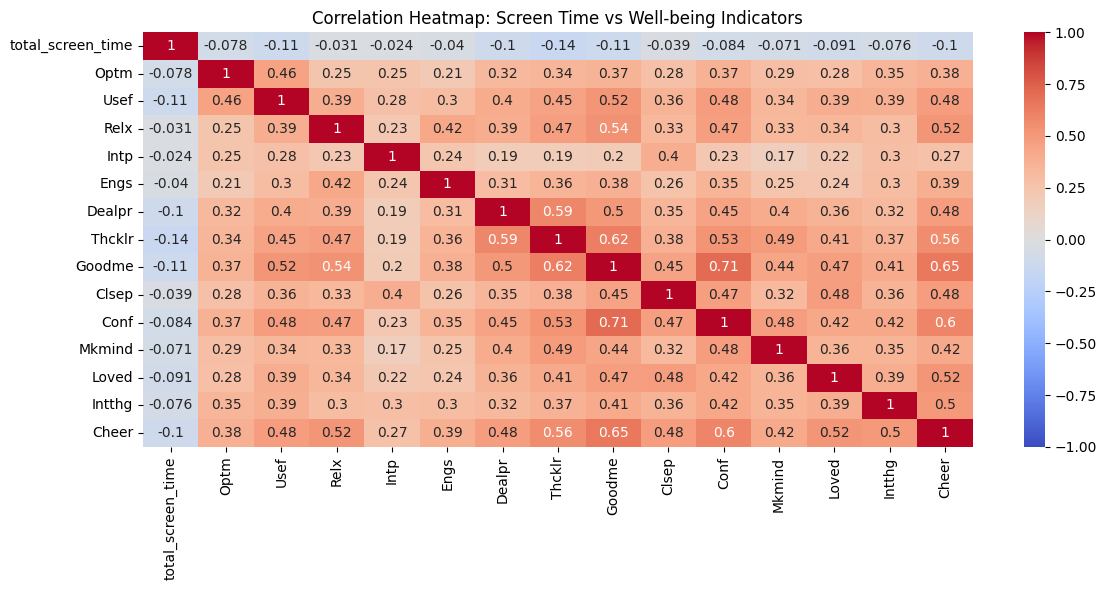

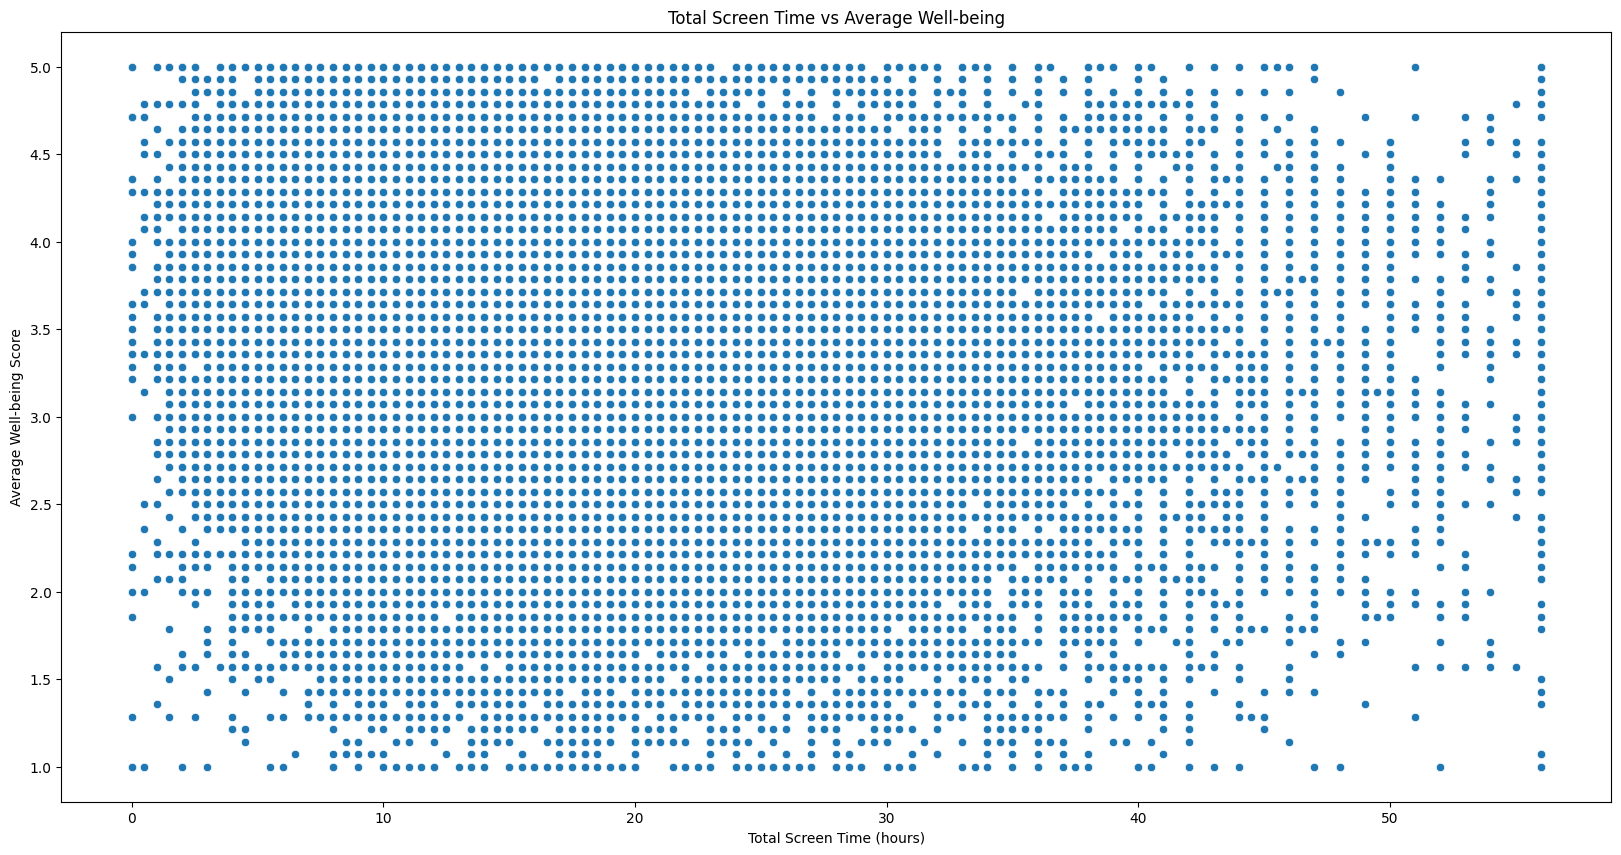

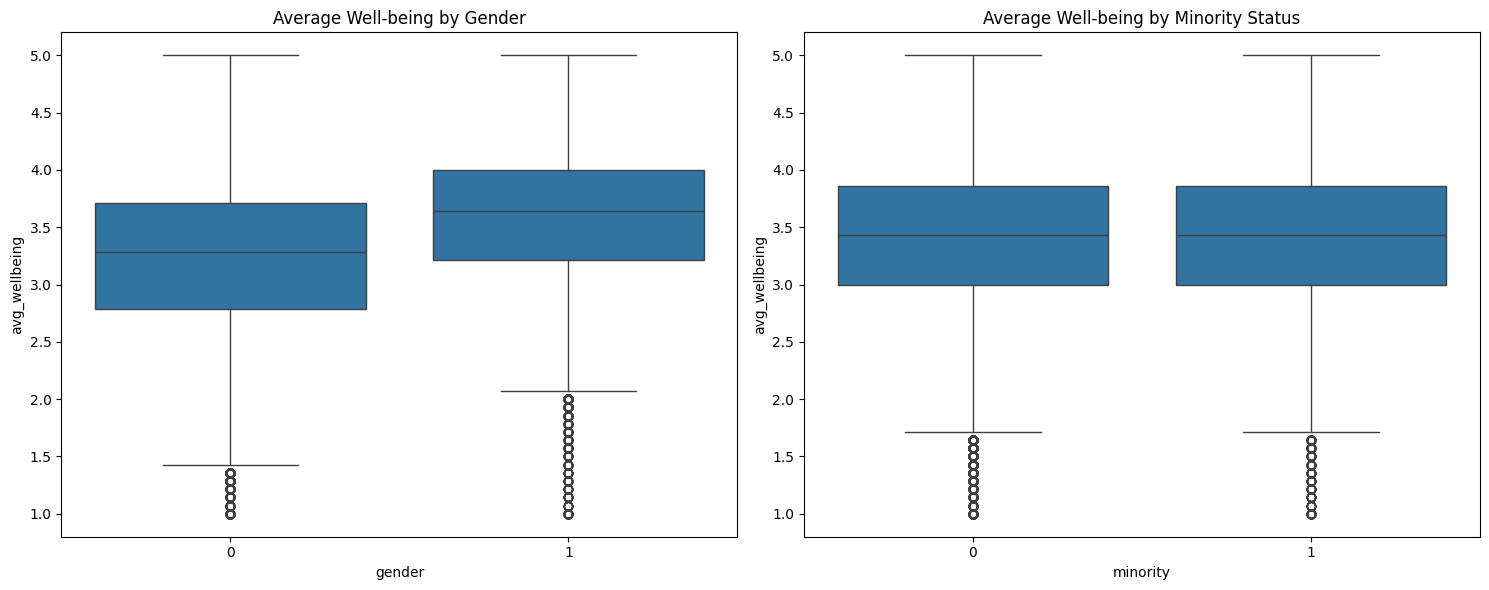

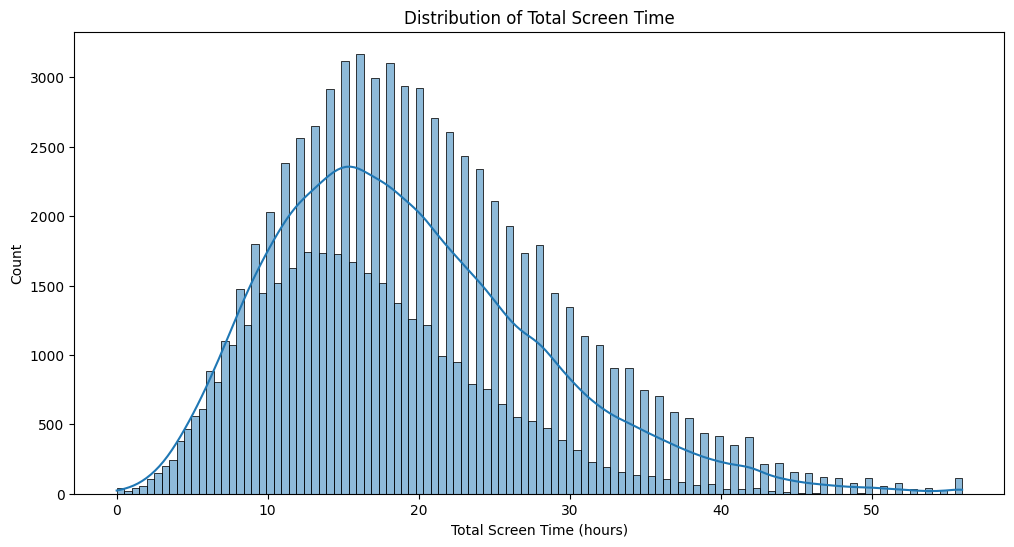

       total_screen_time  avg_wellbeing          Optm          Usef  \
count       98278.000000   98278.000000  98278.000000  98278.000000   
mean           19.283507       3.394208      3.276919      3.107593   
std             8.995372       0.680987      0.997319      0.951901   
min             0.000000       1.000000      1.000000      1.000000   
25%            13.000000       3.000000      3.000000      3.000000   
50%            18.000000       3.428571      3.000000      3.000000   
75%            24.500000       3.857143      4.000000      4.000000   
max            56.000000       5.000000      5.000000      5.000000   

               Relx          Intp          Engs        Dealpr        Thcklr  \
count  98278.000000  98278.000000  98278.000000  98278.000000  98278.000000   
mean       3.096502      3.271658      3.046155      3.370693      3.488726   
std        1.014054      1.017242      1.075498      1.047807      1.017481   
min        1.000000      1.000000      1.000

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the merged dataset
df = pd.read_csv('merged_dataset.csv')

# Correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df[['total_screen_time'] + wellbeing_cols].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap: Screen Time vs Well-being Indicators')
plt.tight_layout()
plt.show()

# Scatter plot: Total screen time vs Average well-being
plt.figure(figsize=(20, 10))
sns.scatterplot(x='total_screen_time', y='avg_wellbeing', data=df)
plt.title('Total Screen Time vs Average Well-being')
plt.xlabel('Total Screen Time (hours)')
plt.ylabel('Average Well-being Score')
plt.show()

# Box plots: Well-being scores by gender and minority status
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
sns.boxplot(x='gender', y='avg_wellbeing', data=df, ax=ax1)
ax1.set_title('Average Well-being by Gender')
sns.boxplot(x='minority', y='avg_wellbeing', data=df, ax=ax2)
ax2.set_title('Average Well-being by Minority Status')
plt.tight_layout()
plt.show()

# Distribution of total screen time
plt.figure(figsize=(12, 6))
sns.histplot(df['total_screen_time'], kde=True)
plt.title('Distribution of Total Screen Time')
plt.xlabel('Total Screen Time (hours)')
plt.show()

# Print summary statistics
print(df[['total_screen_time', 'avg_wellbeing'] + wellbeing_cols].describe())

# Feature Engineering

In [4]:
import pandas as pd
import numpy as np

# Load the merged dataset
df = pd.read_csv('merged_dataset.csv')

# Create features for weekday vs weekend screen time
df['weekday_screen_time'] = df['C_wk'] + df['G_wk'] + df['S_wk'] + df['T_wk']
df['weekend_screen_time'] = df['C_we'] + df['G_we'] + df['S_we'] + df['T_we']

# Create features for different types of screen time
df['computer_time'] = df['C_wk'] + df['C_we']
df['gaming_time'] = df['G_wk'] + df['G_we']
df['smartphone_time'] = df['S_wk'] + df['S_we']
df['tv_time'] = df['T_wk'] + df['T_we']

# Create interaction features
df['screen_time_gender'] = df['total_screen_time'] * df['gender']
df['screen_time_minority'] = df['total_screen_time'] * df['minority']
df['screen_time_deprived'] = df['total_screen_time'] * df['deprived']

# Create non-linear features
df['total_screen_time_squared'] = df['total_screen_time'] ** 2
df['total_screen_time_cubed'] = df['total_screen_time'] ** 3

# Print the new features
print(df[['weekday_screen_time', 'weekend_screen_time', 'computer_time', 'gaming_time', 
          'smartphone_time', 'tv_time', 'screen_time_gender', 'screen_time_minority', 
          'screen_time_deprived', 'total_screen_time_squared', 'total_screen_time_cubed']].head())

# Save the updated dataset
df.to_csv('engineered_dataset.csv', index=False)

   weekday_screen_time  weekend_screen_time  computer_time  gaming_time  \
0                  3.5                  7.5            2.5          1.0   
1                  3.0                  9.0            3.0          0.0   
2                  2.0                  4.5            1.5          0.0   
3                  5.0                  8.5            3.0          0.5   
4                  5.0                  5.0            4.0          0.0   

   smartphone_time  tv_time  screen_time_gender  screen_time_minority  \
0              1.5      6.0                 0.0                   0.0   
1              4.0      5.0                 0.0                   0.0   
2              1.0      4.0                 0.0                   0.0   
3              3.0      7.0                 0.0                   0.0   
4              3.0      3.0                 0.0                   0.0   

   screen_time_deprived  total_screen_time_squared  total_screen_time_cubed  
0                   0.0         

# Model Building

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Load the engineered dataset
df = pd.read_csv('engineered_dataset.csv')

# Prepare features and target
features = ['total_screen_time', 'weekday_screen_time', 'weekend_screen_time', 
            'computer_time', 'gaming_time', 'smartphone_time', 'tv_time', 
            'screen_time_gender', 'screen_time_minority', 'screen_time_deprived', 
            'total_screen_time_squared', 'total_screen_time_cubed', 
            'gender', 'minority', 'deprived']
target = 'avg_wellbeing'

X = df[features]
y = df[target]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=1.0)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R2': r2}

# Print results
for name, metrics in results.items():
    print(f"{name}:")
    print(f"  MSE: {metrics['MSE']:.4f}")
    print(f"  R2: {metrics['R2']:.4f}")
    print()

# Save the best model (assuming it's Linear Regression for simplicity)
import joblib
best_model = models['Linear Regression']
joblib.dump(best_model, 'best_model.joblib')
joblib.dump(scaler, 'scaler.joblib')

Linear Regression:
  MSE: 0.4183
  R2: 0.0911

Ridge Regression:
  MSE: 0.4182
  R2: 0.0913

Lasso Regression:
  MSE: 0.4602
  R2: -0.0000



['scaler.joblib']

# Model Evaluation

Mean Squared Error: 0.4201
R2 Score: 0.0941


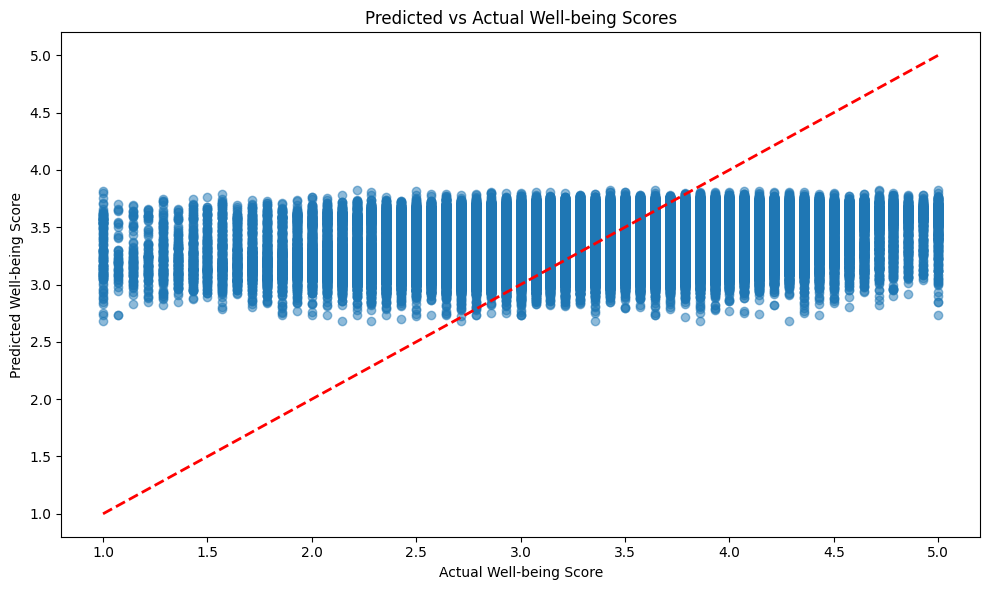

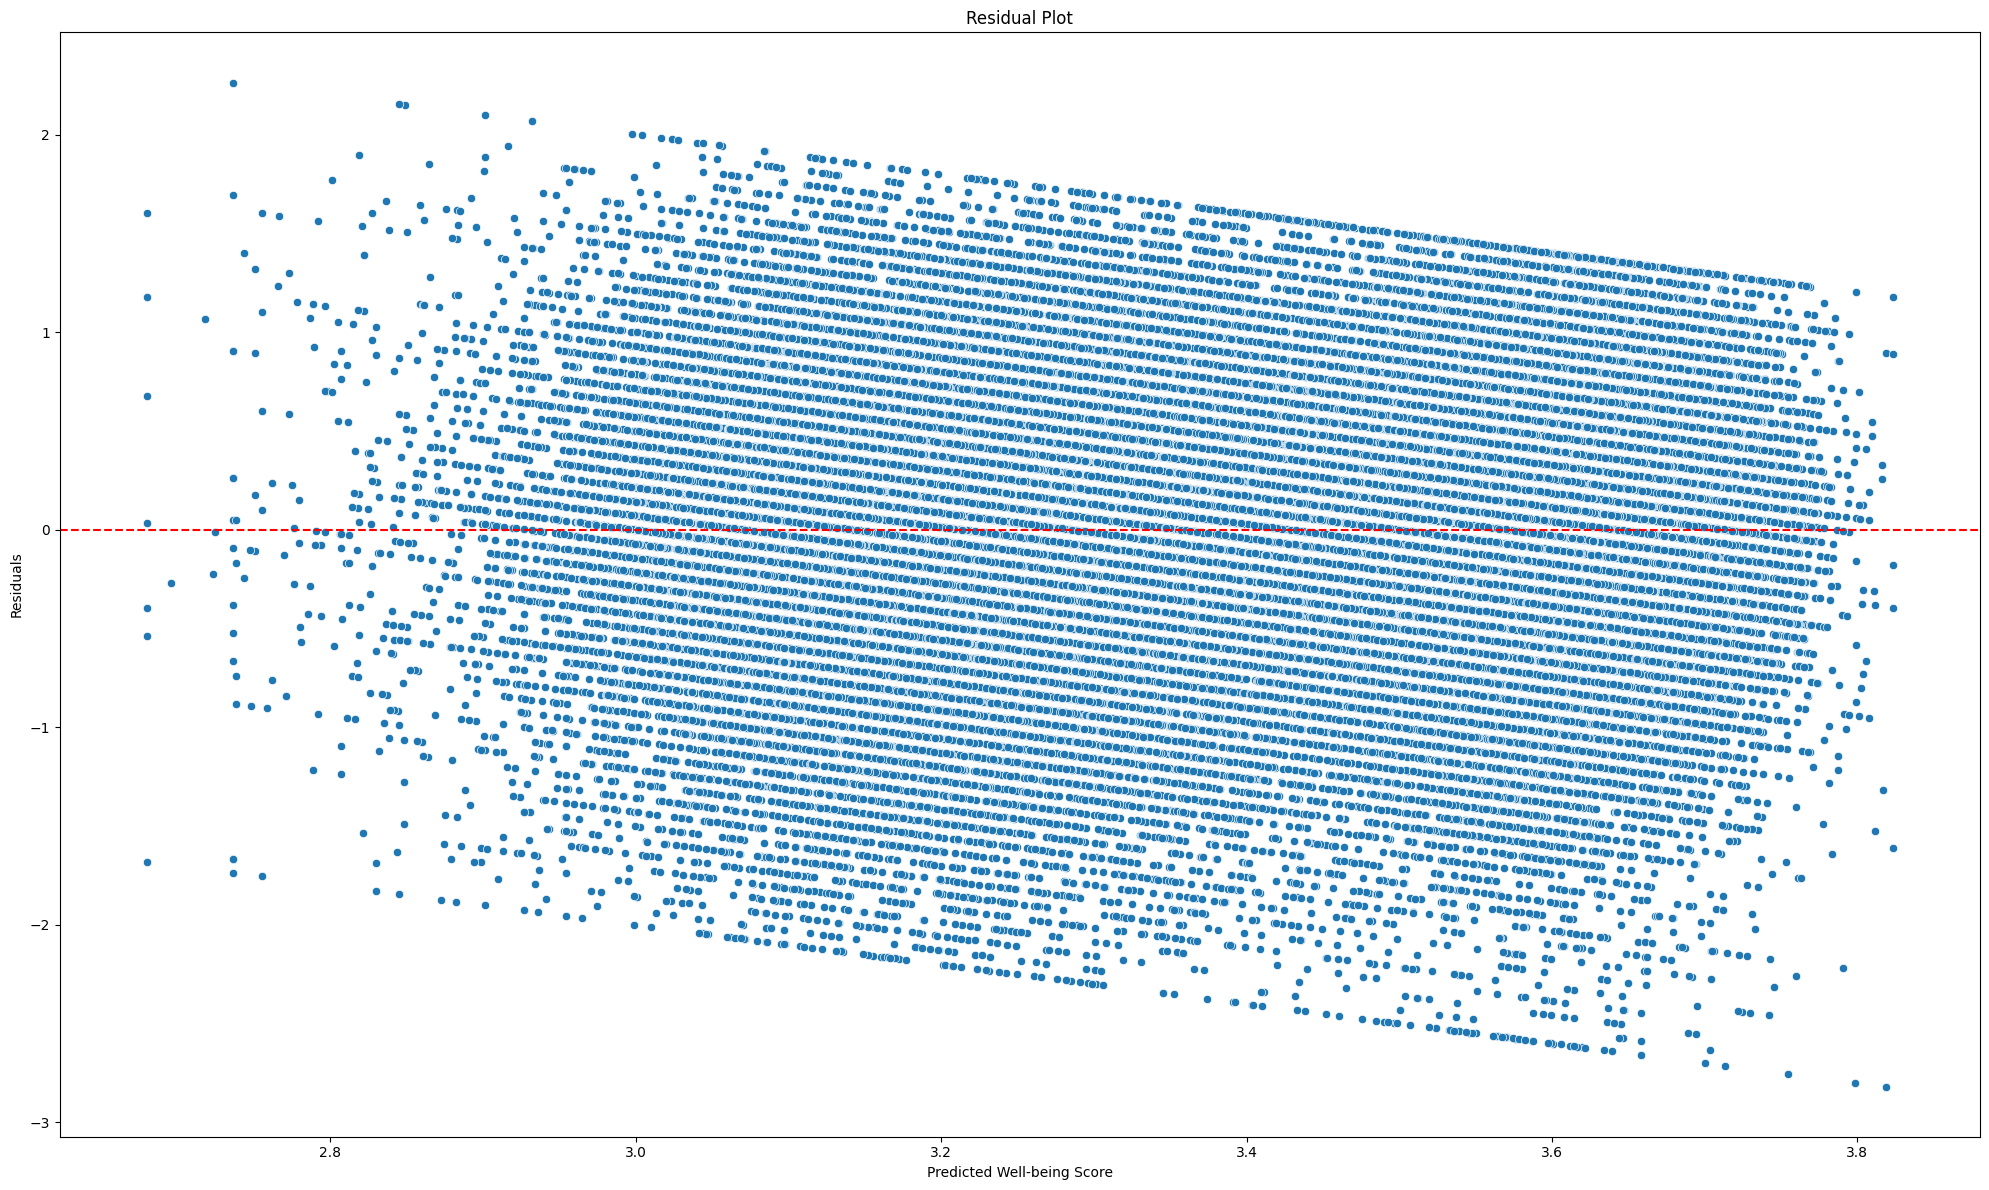

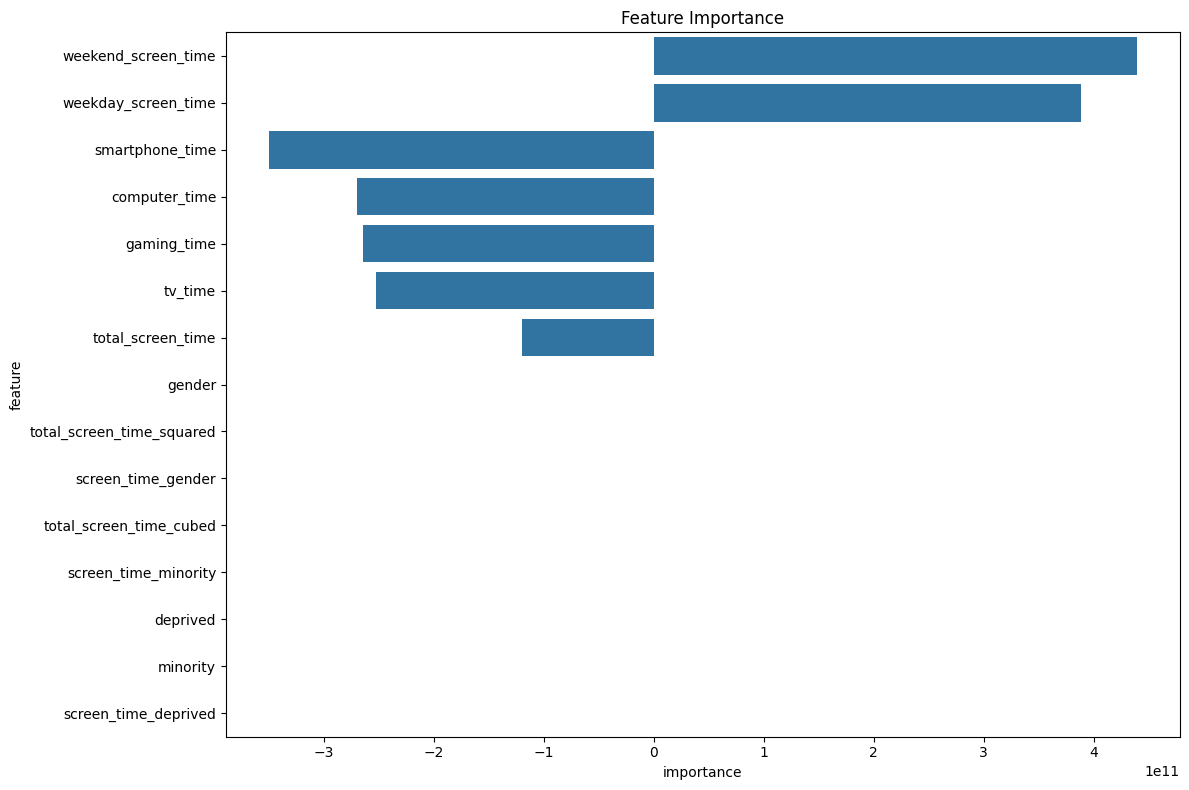

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Load the data, model, and scaler
df = pd.read_csv('engineered_dataset.csv')
best_model = joblib.load('best_model.joblib')
scaler = joblib.load('scaler.joblib')

features = ['total_screen_time', 'weekday_screen_time', 'weekend_screen_time', 
            'computer_time', 'gaming_time', 'smartphone_time', 'tv_time', 
            'screen_time_gender', 'screen_time_minority', 'screen_time_deprived', 
            'total_screen_time_squared', 'total_screen_time_cubed', 
            'gender', 'minority', 'deprived']
target = 'avg_wellbeing'

X = df[features]
y = df[target]

# Scale the features
X_scaled = scaler.transform(X)

# Make predictions
y_pred = best_model.predict(X_scaled)

# Calculate metrics
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R2 Score: {r2:.4f}")

# Plot predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel("Actual Well-being Score")
plt.ylabel("Predicted Well-being Score")
plt.title("Predicted vs Actual Well-being Scores")
plt.tight_layout()
plt.show()

# Plot residuals
residuals = y - y_pred
plt.figure(figsize=(20, 12))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Well-being Score")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.tight_layout()
plt.show()

# Feature importance (for Linear Regression)
feature_importance = pd.DataFrame({'feature': features, 'importance': best_model.coef_})
feature_importance = feature_importance.sort_values('importance', key=abs, ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title("Feature Importance")
plt.tight_layout()
plt.show()